# Unit Testing Bayeschangepoint Detection

In [3]:
import writefile_run as writefile_run

In [4]:
% matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:

import pandas as pd
import numpy as np
import os

# importing the bayesian changepoint main python file to detect changepoints
from anomaly_detectors.bayesian_detector import bayeschangept_wrapper as bayeschangept
from anomaly_detectors.utils import csv_prep_for_reader as csv_helper

import warnings
warnings.filterwarnings('ignore')

In [5]:
reader_kwargs = lambda :{
            'filepath'   :'../../dataset/sample_csv_files/alcohol-demand-log-spirits-consu.csv',
            'filename'   :'alcohol-demand-log-spirits-consu.csv',
            'target_dir' :'../../dataset/reader_csv_files/',
            'assetno'    :'A1',
            'n_rows'     :None,
            'has_time'   :True
            }

algo_kwargs =lambda: {
            'thres_prob':0.5,
            'samples_to_wait':10,
            'expected_run_length':100,
            'to_plot':True
        }

In [6]:
keys = ['thres_prob','samples_to_wait','expected_run_length']

## Test 1 : 
#### Testing with parameters being empty quotes

In [8]:
filepath,params = csv_helper.preparecsvtoread(**reader_kwargs())
algo_kwargs1 = algo_kwargs()
for key in keys:
    algo_kwargs1[key]=''
    res = bayeschangept.main(**algo_kwargs1,filepath=filepath)
    print(res)

{"code": "400", "status": "Bad Request", "message": "should be of type <class 'float'>", "data": {"argument": "pthres", "value": ""}}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'float'>", "data": {"argument": "pthres", "value": ""}}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'float'>", "data": {"argument": "pthres", "value": ""}}


## Test 2 :
#### Testing missing parameters : 

Data reader initialised 

Getting the dataset from the reader....

Overview of data : 
               assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                           0.423880                 


Anomaly detection for AssetNo : A1 ,Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)


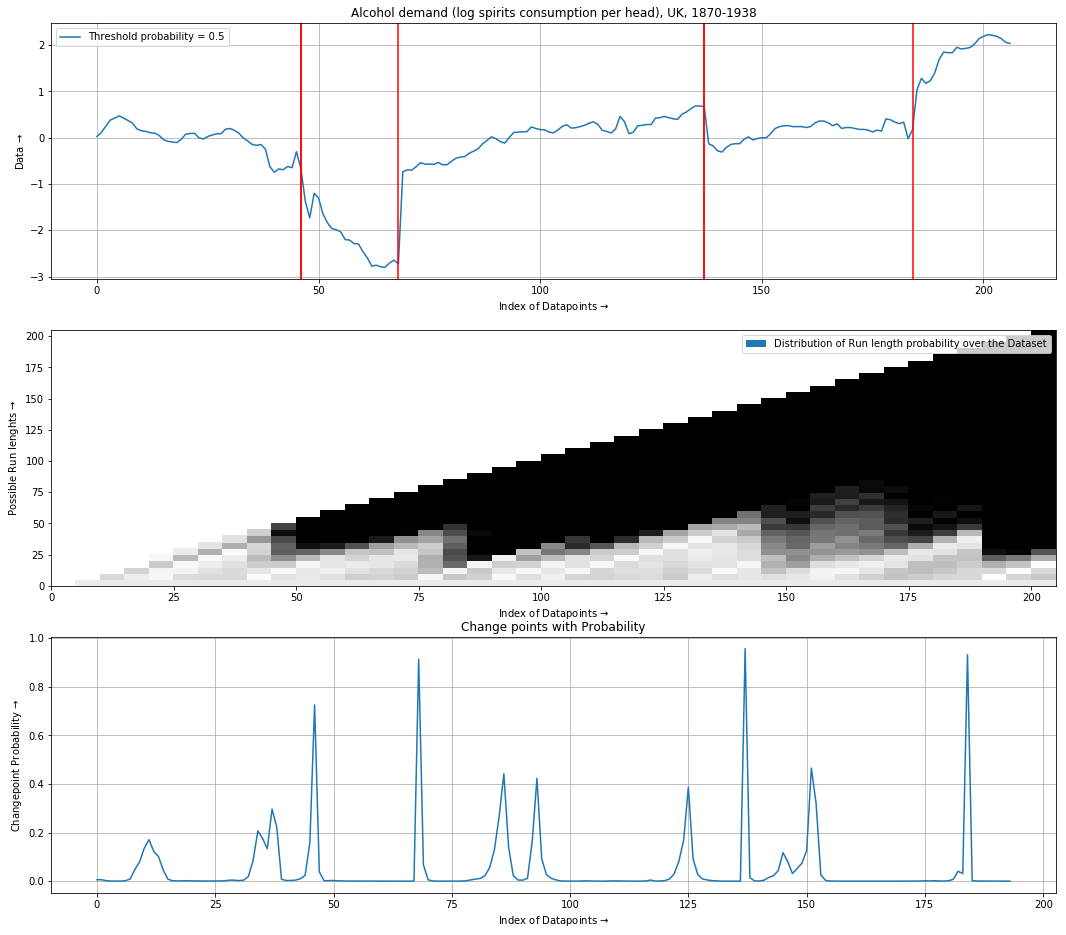


 No of Anomalies detected = 6
{"header": {"code": "200", "status": "OK"}, "body": [{"asset": "A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2432505600000, "to_timestamp": -2432505600000, "anomaly_timestamp": [-2432505600000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1212451200000, "to_timestamp": -1212451200000, "anomaly_timestamp": [-1212451200000], "anomaly_code": "bcp"}]}]}]}
Data read

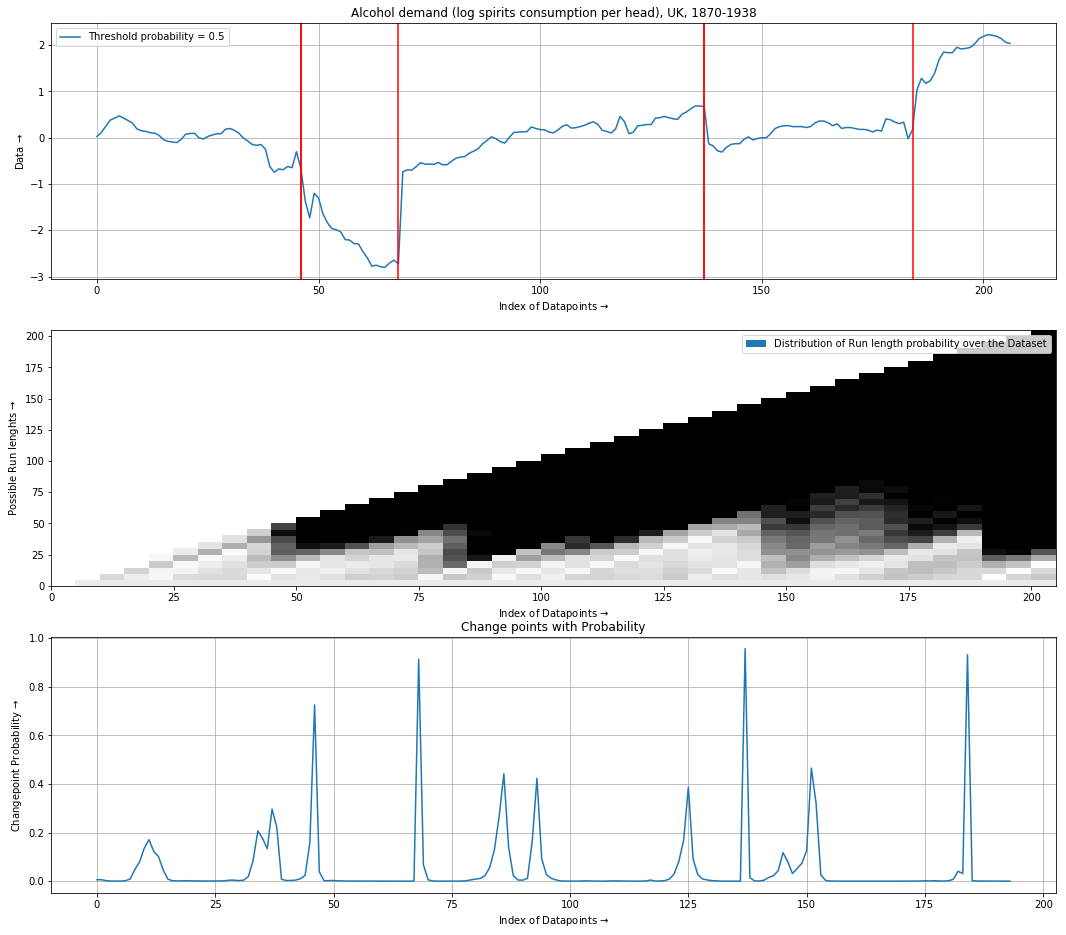


 No of Anomalies detected = 6
{"header": {"code": "200", "status": "OK"}, "body": [{"asset": "A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2432505600000, "to_timestamp": -2432505600000, "anomaly_timestamp": [-2432505600000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1212451200000, "to_timestamp": -1212451200000, "anomaly_timestamp": [-1212451200000], "anomaly_code": "bcp"}]}]}]}
Data read

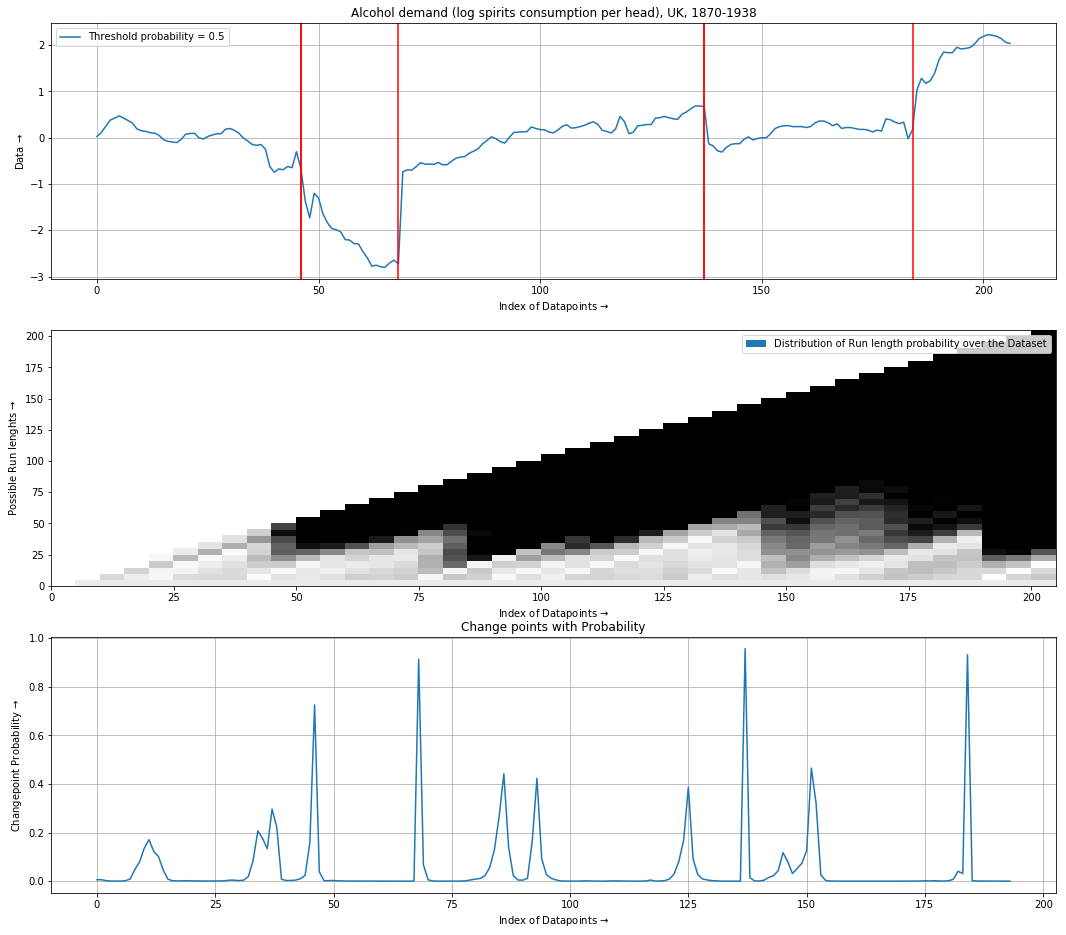


 No of Anomalies detected = 6
{"header": {"code": "200", "status": "OK"}, "body": [{"asset": "A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2432505600000, "to_timestamp": -2432505600000, "anomaly_timestamp": [-2432505600000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1212451200000, "to_timestamp": -1212451200000, "anomaly_timestamp": [-1212451200000], "anomaly_code": "bcp"}]}]}]}


In [9]:
algo_kwargs1 = algo_kwargs()
for key in keys:
    del algo_kwargs1[key]
    res = bayeschangept.main(**algo_kwargs1,filepath=filepath)
    print(res)

## Test 3:
#### Testing parameter type mismatch 

In [10]:
keys

['thres_prob', 'samples_to_wait', 'expected_run_length']

In [12]:
algo_kwargs1 = algo_kwargs()
val = ['2',4.5,'def']
for i,key in enumerate(keys):
    algo_kwargs1 = algo_kwargs()
    algo_kwargs1[key]=val[i]
    res = bayeschangept.main(**algo_kwargs1,filepath=filepath)
    print(res)

{"code": "400", "status": "Bad Request", "message": "should be of type <class 'float'>", "data": {"argument": "pthres", "value": "2"}}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'int'>", "data": {"argument": "Nw", "value": 4.5}}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'int'>", "data": {"argument": "mean_runlen", "value": "def"}}


### User Defined Test Case:
#### Testing the fact that probability threshold must be between 0 and 1

In [14]:
algo_kwargs1 = algo_kwargs()
val = [5,4,100]
for i,p in enumerate(val):
    algo_kwargs1 = algo_kwargs()
    algo_kwargs1['thres_prob'] = p
    res = bayeschangept.main(**algo_kwargs1,filepath=filepath)
    print(res)

{"code": "400", "status": "Bad Request", "message": "probability must be between 0 and 1 and it must be of type int or float", "data": {"argument": "pthres", "value": 5}}
{"code": "400", "status": "Bad Request", "message": "probability must be between 0 and 1 and it must be of type int or float", "data": {"argument": "pthres", "value": 4}}
{"code": "400", "status": "Bad Request", "message": "probability must be between 0 and 1 and it must be of type int or float", "data": {"argument": "pthres", "value": 100}}


## Test 4:
#### Testing Algorithm Logic :
* Running the algorithm for different values of probability thresholds
* so expected o/p behaviour expected is as we increase the probability threshold the no of anomaly detected reduces and reaches zero when set to $1.0$
* Default threshold is $0.5$

Data reader initialised 

Getting the dataset from the reader....

Overview of data : 
               assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                           0.423880                 


Anomaly detection for AssetNo : A1 ,Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)


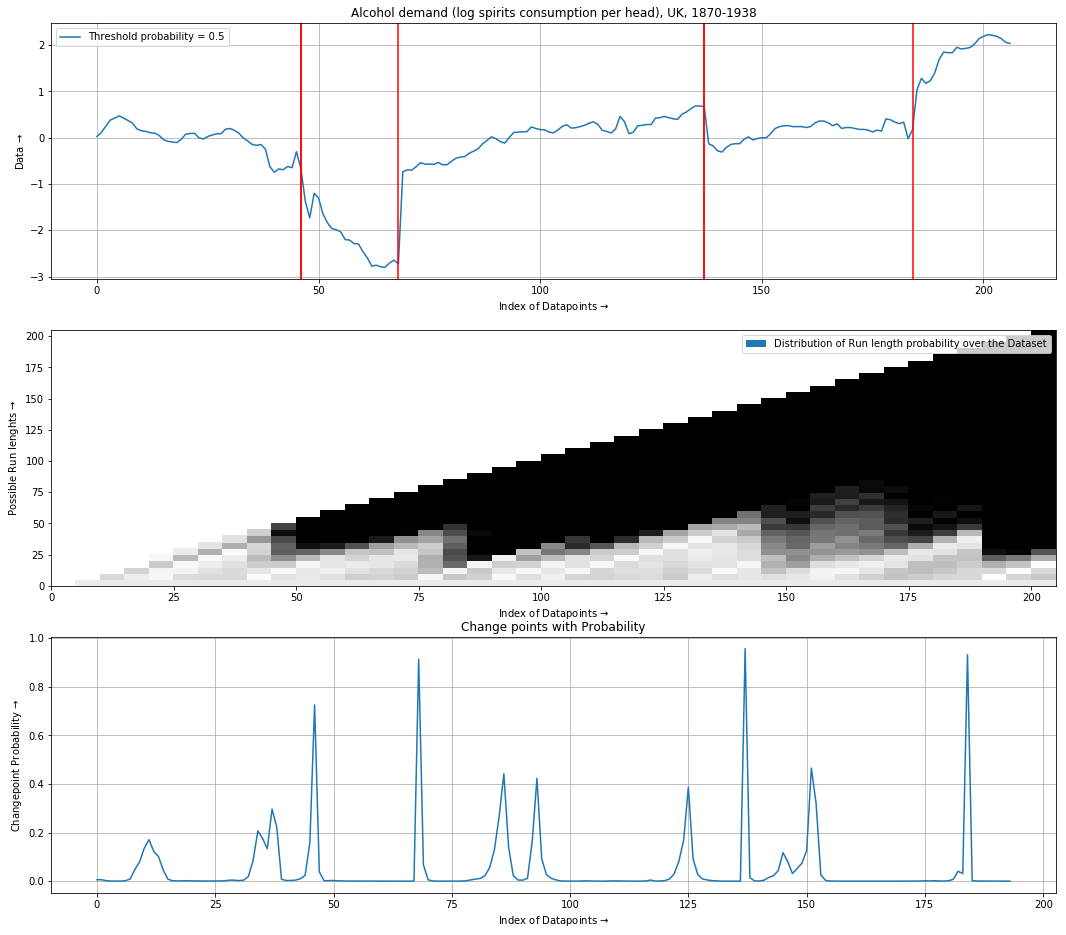


 No of Anomalies detected = 6
{"header": {"code": "200", "status": "OK"}, "body": [{"asset": "A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2432505600000, "to_timestamp": -2432505600000, "anomaly_timestamp": [-2432505600000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1212451200000, "to_timestamp": -1212451200000, "anomaly_timestamp": [-1212451200000], "anomaly_code": "bcp"}]}]}]}
Data read

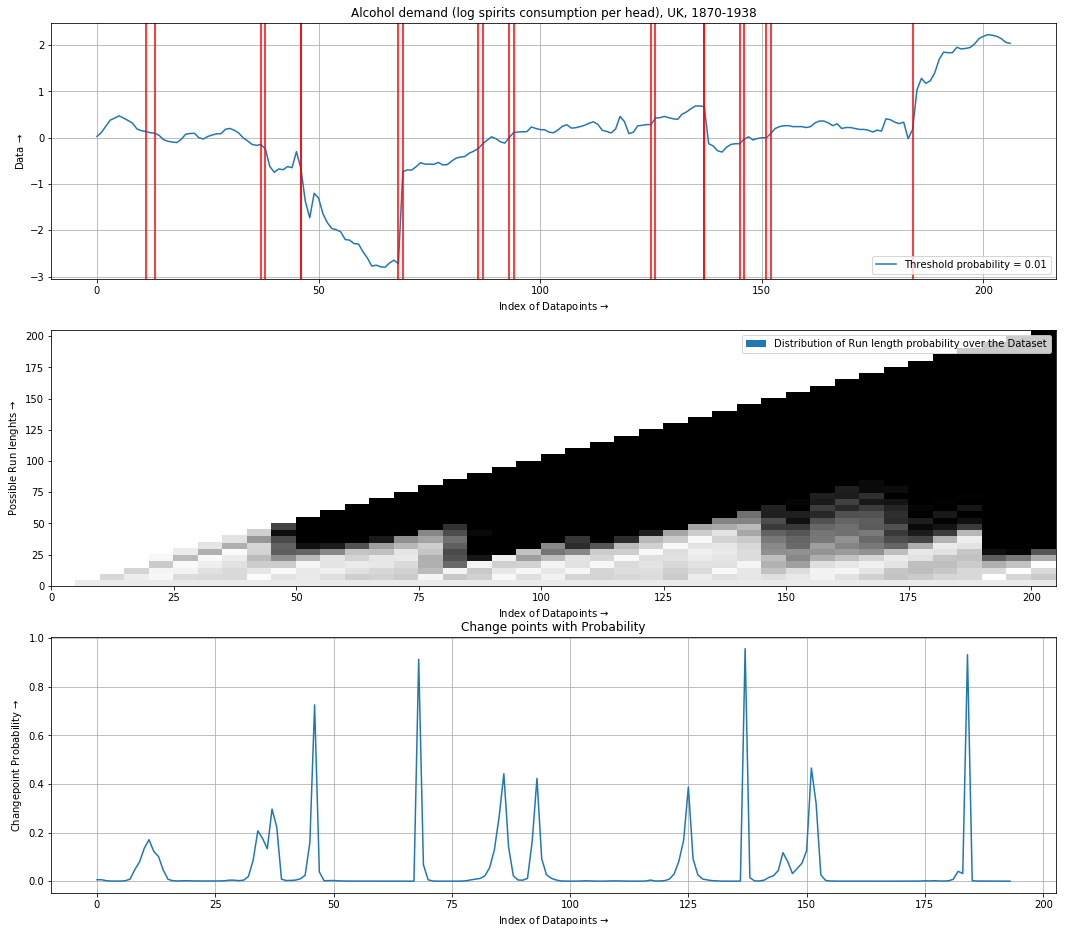


 No of Anomalies detected = 21
{"header": {"code": "200", "status": "OK"}, "body": [{"asset": "A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -3032121600000, "to_timestamp": -3032121600000, "anomaly_timestamp": [-3032121600000], "anomaly_code": "bcp"}, {"from_timestamp": -3011126400000, "to_timestamp": -3011126400000, "anomaly_timestamp": [-3011126400000], "anomaly_code": "bcp"}, {"from_timestamp": -2758665600000, "to_timestamp": -2758665600000, "anomaly_timestamp": [-2758665600000], "anomaly_code": "bcp"}, {"from_timestamp": -2748124800000, "to_timestamp": -2748124800000, "anomaly_timestamp": [-2748124800000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timest

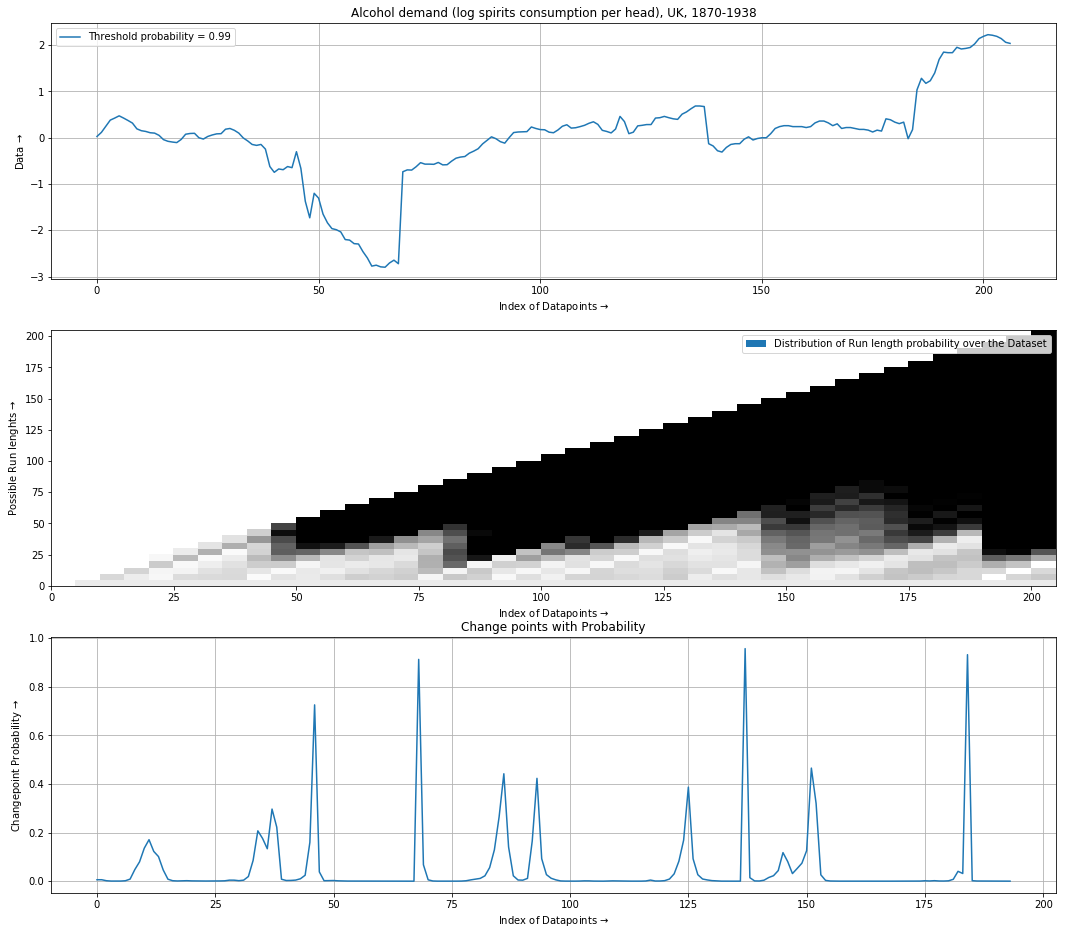


 No of Anomalies detected = 0
{"header": {"code": "200", "status": "OK", "message": "No Anomalies detected"}, "body": []}


In [15]:
algo_kwargs1 = algo_kwargs()

pthreses = [0.5,0.01,0.99]

for i,pthres in enumerate(pthreses):
    algo_kwargs1['thres_prob']=pthres
    res = bayeschangept.main(**algo_kwargs1,filepath=filepath)
    print(res)

#### Observe the effect of expected_run_length on the algorithm


 Anomaly detection for expected run length  = 0

Data reader initialised 

Getting the dataset from the reader....

Overview of data : 
               assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                           0.423880                 


Anomaly detection for AssetNo : A1 ,Metric : Alcohol demand (log spirits consumption per head), U

Traceback (most recent call last):
  File "/home/rohithram/Desktop/internship/sprint1/git_bayes_code/rohithram/anomaly_detectors/bayesian_detector/bayeschangept_wrapper.py", line 132, in main
    data,anom_indexes = anomaly_detector.detect_anomalies()
  File "/home/rohithram/Desktop/internship/sprint1/git_bayes_code/rohithram/anomaly_detectors/bayesian_detector/bayesian_changept_detector.py", line 56, in detect_anomalies
    R,maxes = self.findonchangepoint(data[data.columns[ncol]].values)
  File "/home/rohithram/Desktop/internship/sprint1/git_bayes_code/rohithram/anomaly_detectors/bayesian_detector/bayesian_changept_detector.py", line 70, in findonchangepoint
    oncd.StudentT(0.1, .01, 1, 0))
  File "/home/rohithram/anaconda3/lib/python3.6/site-packages/bayesian_changepoint_detection/online_changepoint_detection.py", line 17, in online_changepoint_detection
    H = hazard_func(np.array(range(t+1)))
  File "/home/rohithram/anaconda3/lib/python3.6/site-packages/bayesian_changepoint_det

{"code": "500", "status": "Unknown Exception", "message": "division by zero"}

 Anomaly detection for expected run length  = 100

Data reader initialised 

Getting the dataset from the reader....

Overview of data : 
               assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                           0.423880                 


Anomaly detection

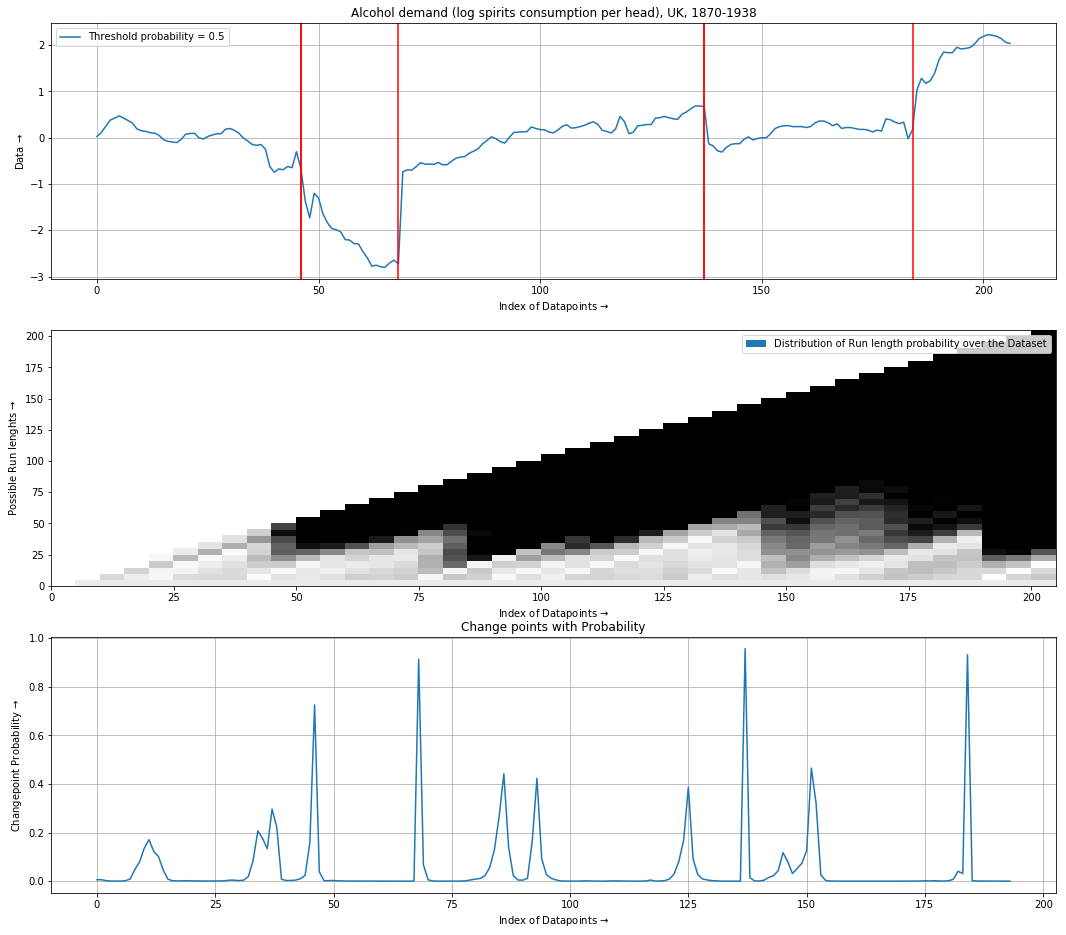


 No of Anomalies detected = 6
{"header": {"code": "200", "status": "OK"}, "body": [{"asset": "A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2432505600000, "to_timestamp": -2432505600000, "anomaly_timestamp": [-2432505600000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1212451200000, "to_timestamp": -1212451200000, "anomaly_timestamp": [-1212451200000], "anomaly_code": "bcp"}]}]}]}

 Anomaly

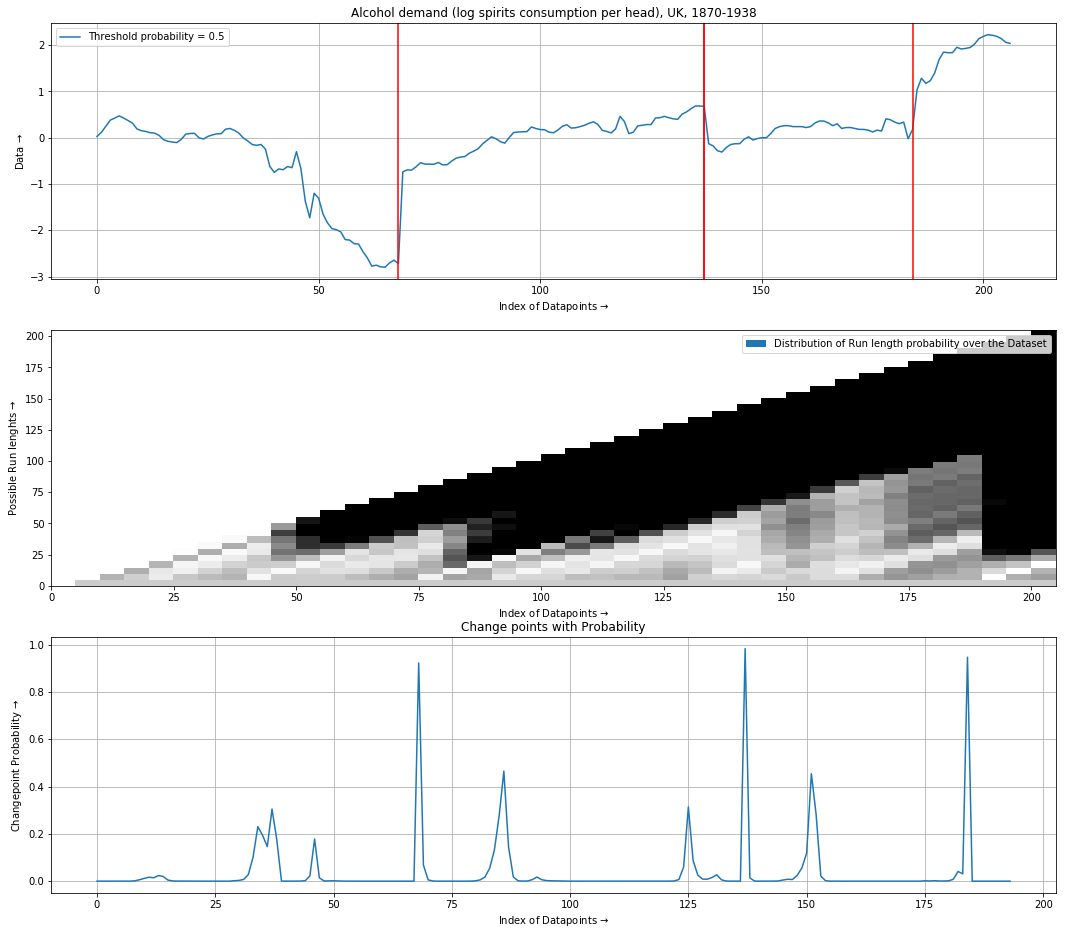


 No of Anomalies detected = 4
{"header": {"code": "200", "status": "OK"}, "body": [{"asset": "A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -2432505600000, "to_timestamp": -2432505600000, "anomaly_timestamp": [-2432505600000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1212451200000, "to_timestamp": -1212451200000, "anomaly_timestamp": [-1212451200000], "anomaly_code": "bcp"}]}]}]}


In [16]:
algo_kwargs1 = algo_kwargs()
algo_kwargs1['thres_prob'] = 0.5
mean_run_lens = [0,100,10000]
for i,mean_run_len in enumerate(mean_run_lens):
    print('\n Anomaly detection for expected run length  = {}\n'.format(mean_run_len))
    algo_kwargs1['expected_run_length']=mean_run_len
    res = bayeschangept.main(**algo_kwargs1,filepath=filepath)
    print(res)

##### Results:
* As we observed that when expected run length given zero. the algo stops and throws an zero division error as expected/
* Then as we increase it from zero, we observed that interval between changepoints increased

## Test 7:
#### Testing the response from program to follow agreed upon template :

Data reader initialised 

Getting the dataset from the reader....

Overview of data : 
               assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                           0.423880                 


Anomaly detection for AssetNo : A1 ,Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)


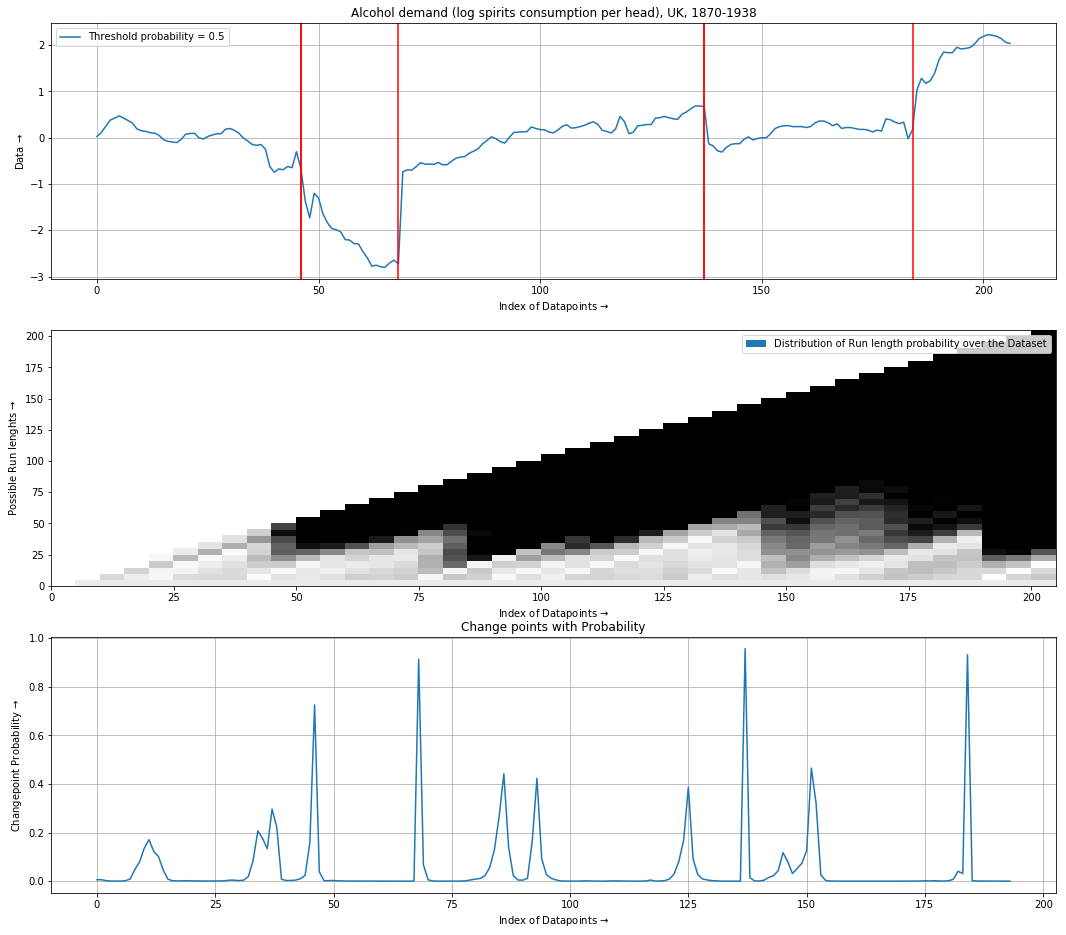


 No of Anomalies detected = 6
{"header": {"code": "200", "status": "OK"}, "body": [{"asset": "A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2432505600000, "to_timestamp": -2432505600000, "anomaly_timestamp": [-2432505600000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1212451200000, "to_timestamp": -1212451200000, "anomaly_timestamp": [-1212451200000], "anomaly_code": "bcp"}]}]}]}


In [17]:
algo_kwargs1 = algo_kwargs()
res = bayeschangept.main(**algo_kwargs1,filepath=filepath)
print(res)

## Test 8:
#### Testing No Data exception :
* To get empty dataframe we set from and to timestamp to be not in range of the timestamps in dataset analysed

In [18]:
algo_kwargs1 = algo_kwargs()
res = bayeschangept.main(**algo_kwargs1,filepath='filepath')
print(res)

Data reader initialised 

{"code": "400", "status": "Bad Request", "message": "File b'filepath' does not exist,filepath", "data": {}}


## Test 11:
#### Testing High Performance :

In [21]:
%%timeit -n 1 -r 1
filepath,params = csv_helper.preparecsvtoread(filepath='../../dataset/bearings_1.csv',
                                              filename='bearings_1.csv',n_rows=15000,has_time=False)

algo_kwargs1 = algo_kwargs()
algo_kwargs1['to_plot']=False
res = bayeschangept.main(**algo_kwargs1,filepath=filepath)
print(res)

Data reader initialised 

Getting the dataset from the reader....

Overview of data : 
            assetno         0
timestamp                    
18880200000      A1  1.451406
18880800000      A1  0.281325
18881400000      A1 -0.411636
18882000000      A1 -0.377556
18882600000      A1  1.337806


Anomaly detection for AssetNo : A1 ,Metric : 0
 
Shape of the dataset : 
(15000, 2)

 No of Anomalies detected = 10
{"header": {"code": "200", "status": "OK"}, "body": [{"asset": "A1", "anomalies": [{"name": "0", "datapoints": [{"from_timestamp": 19599600000, "to_timestamp": 19599600000, "anomaly_timestamp": [19599600000], "anomaly_code": "bcp"}, {"from_timestamp": 21777600000, "to_timestamp": 21777600000, "anomaly_timestamp": [21777600000], "anomaly_code": "bcp"}, {"from_timestamp": 22135200000, "to_timestamp": 22135200000, "anomaly_timestamp": [22135200000], "anomaly_code": "bcp"}, {"from_timestamp": 22522800000, "to_timestamp": 22522800000, "anomaly_timestamp": [22522800000], "anomaly_code

# Conclusion:
* Hence we observe that **Bayesian Changepoint Detection** works well only on level shifts or variational shift datasets over outlier or surge,sag datasets